In [ ]:
import tensorflow as tf
from tensorflow.io import decode_image, read_file
from tensorflow.image import resize_with_crop_or_pad, resize
from tensorflow.keras.layers import RandomRotation, RandomTranslation, RandomZoom, RandomFlip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [ ]:
# returns a cropped and resized 224x224 image
def get_image(image_path):
    image = decode_image(read_file(image_path))
    image = resize_with_crop_or_pad(image, 207, 207)
    image = resize(image, (69, 69))
    image = image / 255
    return image

# converts X, y, and a batch size into a tensorflow dataset
def get_train_dataset(X, y, batch_size):    
    path_dataset = tf.data.Dataset.from_tensor_slices(X)
    image_dataset = path_dataset.map(get_image, num_parallel_calls=tf.data.AUTOTUNE)
    
    label_dataset = tf.data.Dataset.from_tensor_slices(tf.cast(y, tf.float32))

    dataset = tf.data.Dataset.zip(image_dataset, label_dataset)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# converts X into a tensorflow dataset
def get_test_dataset(X, batch_size):
    path_dataset = tf.data.Dataset.from_tensor_slices(X)
    dataset = path_dataset.map(get_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    return dataset

In [ ]:
# generates the training, validation, and testing datasets
def get_datasets(batch_size):
    labels_df = pd.read_csv('./dataset/training_solutions_rev1.csv')
    
    train_paths = os.listdir('./dataset/images_training_rev1/')
    train_paths = ['./dataset/images_training_rev1/' + path for path in train_paths]
    features = labels_df.values[:, 1:]
    X_train, X_val, y_train, y_val = train_test_split(train_paths, features, test_size=0.2, random_state=0)
    train_dataset = get_train_dataset(X_train, y_train, batch_size)
    val_dataset = get_train_dataset(X_val, y_val, batch_size)   
    
    test_paths = os.listdir('./dataset/images_test_rev1/')
    X_test = ['./dataset/images_test_rev1/' + path for path in test_paths]
    test_dataset = get_test_dataset(X_test, batch_size)
    return train_dataset, val_dataset, test_dataset

In [ ]:
train_dataset, validation_dataset, test_dataset = get_datasets(128)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import random
import matplotlib.pyplot as plt

2023-11-15 01:35:38.881865: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-15 01:35:39.023920: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 01:35:39.874138: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
df = pd.read_csv('./dataset/training_solutions_rev1.csv')

df_train, df_test = train_test_split(df[:30000], test_size=.2)
df_train.shape, df_test.shape

((24000, 38), (6000, 38))

In [4]:
df_train.describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,320480.657458,0.431070,0.543953,0.024977,0.106792,0.437161,0.102200,0.334961,0.217018,0.220144,...,0.032801,0.092747,0.083872,0.040399,0.015764,0.093807,0.017998,0.007765,0.007213,0.074472
std,126251.407476,0.282107,0.294992,0.037433,0.212807,0.301349,0.177151,0.247954,0.285810,0.179016,...,0.098038,0.145869,0.139466,0.101349,0.053496,0.193078,0.068701,0.038601,0.038706,0.108026
min,100023.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210580.750000,0.176696,0.284774,0.000000,0.000000,0.169608,0.000000,0.123368,0.000000,0.073199,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,321823.500000,0.415572,0.560034,0.014866,0.000000,0.400510,0.000000,0.293071,0.096185,0.184547,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,429064.250000,0.675008,0.810269,0.034152,0.086324,0.693957,0.134750,0.517853,0.336326,0.338267,...,0.000000,0.148995,0.126724,0.030913,0.000000,0.098323,0.000000,0.000000,0.000000,0.129625
max,540188.000000,1.000000,1.000000,0.935147,1.000000,1.000000,0.998000,1.000000,1.000000,0.925311,...,0.901991,0.949733,0.839347,0.996952,0.843726,1.000000,0.946712,0.957000,0.938881,0.664057


In [5]:
print("Shape of the train set: ",df_train.shape)

print("Shape of the test set: ",df_test.shape)

Shape of the train set:  (24000, 38)
Shape of the test set:  (6000, 38)


In [6]:
trainPath = './dataset/images_training_rev1'
testPath = './dataset/images_test_rev1'

In [7]:
def plot_random_galaxy(path, sample = 5):
    random_image=random.sample(os.listdir(path),sample)
 
    plt.figure(figsize=(16,5))
    for i in range(sample):
        
        plt.subplot(1,sample,i+1)
        img=tf.io.read_file(os.path.join(path,random_image[i]))
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'Class: {random_image[i]}\nShape: {img.shape}')
        plt.axis(False) 

2023-11-15 01:35:50.390770: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 01:35:50.525419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 01:35:50.525473: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 01:35:50.529018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 01:35:50.529072: I tensorflow/compile

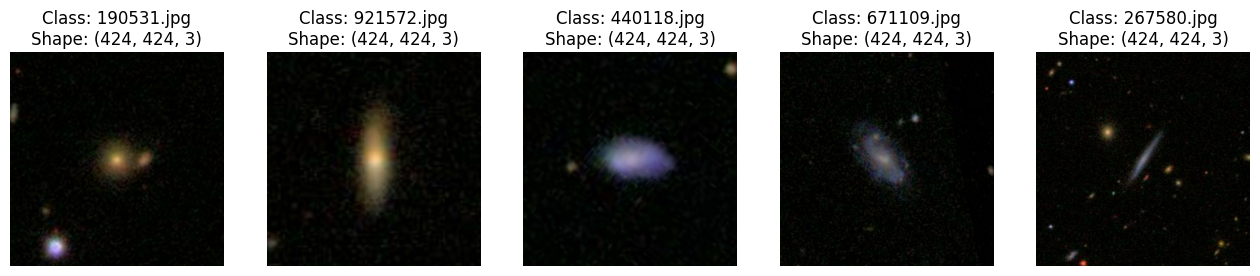

In [8]:
plot_random_galaxy(trainPath)

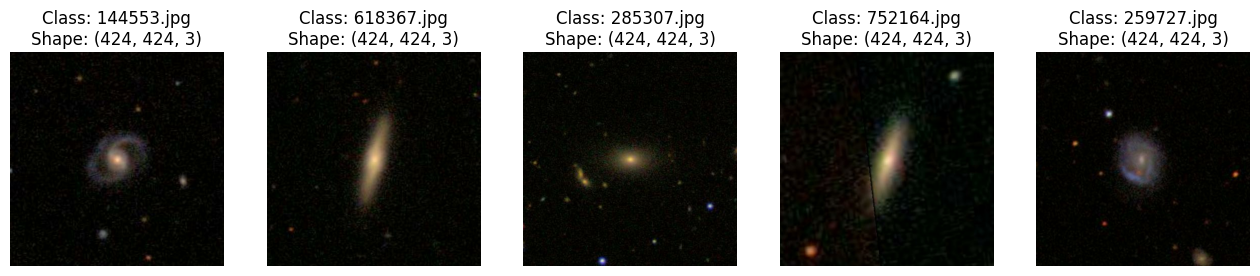

In [9]:
plot_random_galaxy(testPath)

In [10]:

from skimage.transform import resize
from tqdm import tqdm # progress which the model
import matplotlib.pyplot as plt
%matplotlib inline
          

ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('./dataset/images_training_rev1/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)

100%|██████████| 6000/6000 [00:28<00:00, 213.61it/s]


In [11]:
X_train.shape

(24000, 64, 64, 3)

In [12]:
df_train.values[0].shape

(38,)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#to use two GPUs in parallel
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = Sequential()
    model.add(Conv2D(512, (3, 3), input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
    model.add(Conv2D(256, (3, 3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3)))
    model.add(Conv2D(128, (3, 3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(Conv2D(128, (3, 3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(GlobalMaxPooling2D())


    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(37))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy',root_mean_squared_error])

model.summary()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 512)       14336     
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 256)       1179904   
                                                                 
 activation (Activation)     (None, 60, 60, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 256)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       590080    
                                                                 
 conv2d_3 (Conv2D)  

In [14]:
batch_size = 128
with strategy.scope():
    model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_data=(X_test, y_test),use_multiprocessing=True)

Epoch 1/20
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tens

2023-11-15 01:38:05.192760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2023-11-15 01:38:06.496731: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 01:38:08.477799: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-15 01:38:08.495757: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9c5e4ca650 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-15 01:38:08.495790: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-11-15 01:38:08.519321: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-15 01:38:08.61080

750/750 [==============================] - 35s 35ms/step - loss: 0.3283 - accuracy: 0.5631 - root_mean_squared_error: 0.1842 - val_loss: 0.3008 - val_accuracy: 0.5912 - val_root_mean_squared_error: 0.1646
Epoch 2/20
750/750 [==============================] - 25s 33ms/step - loss: 0.3040 - accuracy: 0.6003 - root_mean_squared_error: 0.1665 - val_loss: 0.2998 - val_accuracy: 0.5912 - val_root_mean_squared_error: 0.1639
Epoch 3/20
750/750 [==============================] - 25s 33ms/step - loss: 0.2979 - accuracy: 0.5999 - root_mean_squared_error: 0.1609 - val_loss: 0.2946 - val_accuracy: 0.5912 - val_root_mean_squared_error: 0.1591
Epoch 4/20
750/750 [==============================] - 23s 31ms/step - loss: 0.2934 - accuracy: 0.5989 - root_mean_squared_error: 0.1568 - val_loss: 0.2897 - val_accuracy: 0.5912 - val_root_mean_squared_error: 0.1541
Epoch 5/20
750/750 [==============================] - 23s 31ms/step - loss: 0.2899 - accuracy: 0.6079 - root_mean_squared_error: 0.1533 - val_loss:

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./dataset/training_solutions_rev1.csv')

df_train, df_test = train_test_split(df, test_size=.2)
df_train.shape, df_test.shape

((49262, 38), (12316, 38))

In [2]:
df = pd.read_csv('./dataset/training_solutions_rev1.csv')

df_train, df_test = train_test_split(df[:15000], test_size=.2)
df_train.shape, df_test.shape

((12000, 38), (3000, 38))

In [3]:
from skimage.transform import resize
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
          

ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('./dataset/images_training_rev1/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)

100%|██████████| 3000/3000 [00:09<00:00, 314.00it/s]


In [4]:
y_train.shape

(16000, 37)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model = Sequential()
model.add(Conv2D(512, (3, 3), input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
model.add(Conv2D(256, (3, 3)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Conv2D(128, (3, 3)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Conv2D(128, (3, 3)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())


model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(37))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=[root_mean_squared_error])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 512)       14336     
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 256)       1179904   
                                                                 
 activation_7 (Activation)   (None, 60, 60, 256)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 256)       590080    
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 128)       295040    
                                                      

In [7]:
batch_size, epochs = 32, 5
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/5


2023-11-15 00:04:17.819310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2023-11-15 00:04:19.373302: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


: 

In [ ]:
import os
from tqdm import tqdm

def test_image_generator(ids, shape=IMG_SHAPE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
    x_batch = []
    for i in ids:
        x = get_image('./images_test_rev1/'+i, x1, y1, shape=IMG_SHAPE, crop_size=CROP_SIZE)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch

val_files = os.listdir('./images_test_rev1/')
val_predictions = []
N_val = len(val_files)
for i in tqdm(np.arange(0, N_val, batch_size)):
    if i+batch_size > N_val:
        upper = N_val
    else:
        upper = i+batch_size
    X = test_image_generator(val_files[i:upper])
    y_pred = model.predict(X)
    val_predictions.append(y_pred)
val_predictions = np.array(val_predictions)
Y_pred = np.vstack(val_predictions)
ids = np.array([v.split('.')[0] for v in val_files]).reshape(len(val_files),1)
submission_df = pd.DataFrame(np.hstack((ids, Y_pred)), columns=df.columns)
submission_df = submission_df.sort_values(by=['GalaxyID'])
submission_df.to_csv('submission_1.csv', index=False)

  0%|          | 0/625 [00:00<?, ?it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 1/625 [00:00<05:47,  1.80it/s]

4/4 [==============================] - 0s 10ms/step


  0%|          | 2/625 [00:01<05:13,  1.98it/s]

4/4 [==============================] - 0s 9ms/step


  0%|          | 3/625 [00:01<05:02,  2.06it/s]

4/4 [==============================] - 0s 17ms/step


  1%|          | 4/625 [00:01<05:04,  2.04it/s]

4/4 [==============================] - 0s 19ms/step


  1%|          | 5/625 [00:02<05:08,  2.01it/s]

4/4 [==============================] - 0s 21ms/step


  1%|          | 6/625 [00:03<05:09,  2.00it/s]

4/4 [==============================] - 0s 22ms/step


  1%|          | 7/625 [00:03<05:11,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


  1%|▏         | 8/625 [00:04<05:16,  1.95it/s]

4/4 [==============================] - 0s 20ms/step


  1%|▏         | 9/625 [00:04<05:16,  1.95it/s]

4/4 [==============================] - 0s 20ms/step


  2%|▏         | 10/625 [00:05<05:14,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


  2%|▏         | 11/625 [00:05<05:12,  1.97it/s]

4/4 [==============================] - 0s 25ms/step


  2%|▏         | 12/625 [00:06<05:14,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


  2%|▏         | 13/625 [00:06<05:14,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


  2%|▏         | 14/625 [00:07<05:13,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


  2%|▏         | 15/625 [00:07<05:10,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


  3%|▎         | 16/625 [00:08<05:08,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


  3%|▎         | 17/625 [00:08<05:07,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


  3%|▎         | 18/625 [00:09<05:07,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


  3%|▎         | 19/625 [00:09<05:05,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


  3%|▎         | 20/625 [00:10<05:06,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


  3%|▎         | 21/625 [00:10<05:08,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


  4%|▎         | 22/625 [00:11<05:07,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


  4%|▎         | 23/625 [00:11<05:06,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


  4%|▍         | 24/625 [00:12<05:06,  1.96it/s]

4/4 [==============================] - 0s 24ms/step


  4%|▍         | 25/625 [00:12<05:07,  1.95it/s]

4/4 [==============================] - 0s 20ms/step


  4%|▍         | 26/625 [00:13<05:07,  1.95it/s]

4/4 [==============================] - 0s 20ms/step


  4%|▍         | 27/625 [00:13<05:04,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


  4%|▍         | 28/625 [00:14<05:02,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


  5%|▍         | 29/625 [00:14<05:02,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


  5%|▍         | 30/625 [00:15<05:00,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


  5%|▍         | 31/625 [00:15<05:00,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


  5%|▌         | 32/625 [00:16<04:59,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


  5%|▌         | 33/625 [00:16<05:00,  1.97it/s]

4/4 [==============================] - 0s 24ms/step


  5%|▌         | 34/625 [00:17<05:02,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


  6%|▌         | 35/625 [00:17<05:02,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


  6%|▌         | 36/625 [00:18<04:59,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


  6%|▌         | 37/625 [00:18<04:57,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


  6%|▌         | 38/625 [00:19<05:00,  1.95it/s]

4/4 [==============================] - 0s 20ms/step


  6%|▌         | 39/625 [00:19<04:59,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


  6%|▋         | 40/625 [00:20<04:55,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


  7%|▋         | 41/625 [00:20<04:55,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


  7%|▋         | 42/625 [00:21<04:55,  1.97it/s]

4/4 [==============================] - 0s 23ms/step


  7%|▋         | 43/625 [00:21<04:56,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


  7%|▋         | 44/625 [00:22<04:54,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


  7%|▋         | 45/625 [00:22<04:52,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


  7%|▋         | 46/625 [00:23<04:52,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


  8%|▊         | 47/625 [00:23<04:52,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


  8%|▊         | 48/625 [00:24<04:49,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


  8%|▊         | 49/625 [00:24<04:48,  2.00it/s]

4/4 [==============================] - 0s 21ms/step


  8%|▊         | 50/625 [00:25<04:48,  1.99it/s]

4/4 [==============================] - 0s 24ms/step


  8%|▊         | 51/625 [00:25<04:50,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


  8%|▊         | 52/625 [00:26<04:53,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


  8%|▊         | 53/625 [00:26<04:53,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


  9%|▊         | 54/625 [00:27<04:50,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


  9%|▉         | 55/625 [00:27<04:47,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


  9%|▉         | 56/625 [00:28<04:45,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


  9%|▉         | 57/625 [00:28<04:46,  1.98it/s]

4/4 [==============================] - 0s 23ms/step


  9%|▉         | 58/625 [00:29<04:47,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


  9%|▉         | 59/625 [00:29<04:45,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 10%|▉         | 60/625 [00:30<04:44,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 10%|▉         | 61/625 [00:30<04:44,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 10%|▉         | 62/625 [00:31<04:42,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 10%|█         | 63/625 [00:31<04:41,  2.00it/s]

4/4 [==============================] - 0s 20ms/step


 10%|█         | 64/625 [00:32<04:41,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 10%|█         | 65/625 [00:32<04:42,  1.99it/s]

4/4 [==============================] - 0s 25ms/step


 11%|█         | 66/625 [00:33<04:42,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 11%|█         | 67/625 [00:33<04:41,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 11%|█         | 68/625 [00:34<04:39,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 11%|█         | 69/625 [00:34<04:41,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 11%|█         | 70/625 [00:35<04:40,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 11%|█▏        | 71/625 [00:35<04:38,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 12%|█▏        | 72/625 [00:36<04:38,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 12%|█▏        | 73/625 [00:36<04:37,  1.99it/s]

4/4 [==============================] - 0s 24ms/step


 12%|█▏        | 74/625 [00:37<04:38,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 12%|█▏        | 75/625 [00:37<04:38,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 12%|█▏        | 76/625 [00:38<04:38,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 12%|█▏        | 77/625 [00:39<04:37,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 12%|█▏        | 78/625 [00:39<04:37,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 13%|█▎        | 79/625 [00:40<04:36,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 13%|█▎        | 80/625 [00:40<04:36,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 13%|█▎        | 81/625 [00:41<04:38,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 13%|█▎        | 82/625 [00:41<04:36,  1.97it/s]

4/4 [==============================] - 0s 24ms/step


 13%|█▎        | 83/625 [00:42<04:37,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 13%|█▎        | 84/625 [00:42<04:35,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 14%|█▎        | 85/625 [00:43<04:33,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 14%|█▍        | 86/625 [00:43<04:31,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 14%|█▍        | 87/625 [00:44<04:31,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 14%|█▍        | 88/625 [00:44<04:30,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 14%|█▍        | 89/625 [00:45<04:30,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 14%|█▍        | 90/625 [00:45<04:29,  1.98it/s]

4/4 [==============================] - 0s 22ms/step


 15%|█▍        | 91/625 [00:46<04:30,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 15%|█▍        | 92/625 [00:46<04:29,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 15%|█▍        | 93/625 [00:47<04:27,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 15%|█▌        | 94/625 [00:47<04:26,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 15%|█▌        | 95/625 [00:48<04:26,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 15%|█▌        | 96/625 [00:48<04:25,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 16%|█▌        | 97/625 [00:49<04:24,  2.00it/s]

4/4 [==============================] - 0s 23ms/step


 16%|█▌        | 98/625 [00:49<04:25,  1.99it/s]

4/4 [==============================] - 0s 22ms/step


 16%|█▌        | 99/625 [00:50<04:25,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 16%|█▌        | 100/625 [00:50<04:24,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 16%|█▌        | 101/625 [00:51<04:23,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 16%|█▋        | 102/625 [00:51<04:22,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 16%|█▋        | 103/625 [00:52<04:22,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 17%|█▋        | 104/625 [00:52<04:22,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 17%|█▋        | 105/625 [00:53<04:22,  1.98it/s]

4/4 [==============================] - 0s 25ms/step


 17%|█▋        | 106/625 [00:53<04:24,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 17%|█▋        | 107/625 [00:54<04:22,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 17%|█▋        | 108/625 [00:54<04:22,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 17%|█▋        | 109/625 [00:55<04:20,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 18%|█▊        | 110/625 [00:55<04:20,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 18%|█▊        | 111/625 [00:56<04:20,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 18%|█▊        | 112/625 [00:56<04:20,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 18%|█▊        | 113/625 [00:57<04:19,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 18%|█▊        | 114/625 [00:57<04:19,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 18%|█▊        | 115/625 [00:58<04:21,  1.95it/s]

4/4 [==============================] - 0s 20ms/step


 19%|█▊        | 116/625 [00:58<04:20,  1.95it/s]

4/4 [==============================] - 0s 24ms/step


 19%|█▊        | 117/625 [00:59<04:20,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 19%|█▉        | 118/625 [00:59<04:19,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 19%|█▉        | 119/625 [01:00<04:20,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 19%|█▉        | 120/625 [01:00<04:18,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 19%|█▉        | 121/625 [01:01<04:18,  1.95it/s]

4/4 [==============================] - 0s 20ms/step


 20%|█▉        | 122/625 [01:01<04:15,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 20%|█▉        | 123/625 [01:02<04:14,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 20%|█▉        | 124/625 [01:02<04:13,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 20%|██        | 125/625 [01:03<04:13,  1.97it/s]

4/4 [==============================] - 0s 24ms/step


 20%|██        | 126/625 [01:03<04:15,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 20%|██        | 127/625 [01:04<04:12,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 20%|██        | 128/625 [01:04<04:11,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 21%|██        | 129/625 [01:05<04:09,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 21%|██        | 130/625 [01:05<04:09,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 21%|██        | 131/625 [01:06<04:07,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 21%|██        | 132/625 [01:06<04:08,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 21%|██▏       | 133/625 [01:07<04:06,  1.99it/s]

4/4 [==============================] - 0s 25ms/step


 21%|██▏       | 134/625 [01:07<04:08,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 22%|██▏       | 135/625 [01:08<04:07,  1.98it/s]

4/4 [==============================] - 0s 22ms/step


 22%|██▏       | 136/625 [01:08<04:07,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 22%|██▏       | 137/625 [01:09<04:05,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 22%|██▏       | 138/625 [01:09<04:06,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 22%|██▏       | 139/625 [01:10<04:04,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 22%|██▏       | 140/625 [01:10<04:06,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 23%|██▎       | 141/625 [01:11<04:07,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 23%|██▎       | 142/625 [01:11<04:06,  1.96it/s]

4/4 [==============================] - 0s 23ms/step


 23%|██▎       | 143/625 [01:12<04:05,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 23%|██▎       | 144/625 [01:12<04:04,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 23%|██▎       | 145/625 [01:13<04:03,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 23%|██▎       | 146/625 [01:13<04:01,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 24%|██▎       | 147/625 [01:14<04:01,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 24%|██▎       | 148/625 [01:14<03:59,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 24%|██▍       | 149/625 [01:15<03:59,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 24%|██▍       | 150/625 [01:15<03:59,  1.99it/s]

4/4 [==============================] - 0s 25ms/step


 24%|██▍       | 151/625 [01:16<04:00,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 24%|██▍       | 152/625 [01:16<03:59,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 24%|██▍       | 153/625 [01:17<03:58,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 25%|██▍       | 154/625 [01:17<03:58,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 25%|██▍       | 155/625 [01:18<03:57,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 25%|██▍       | 156/625 [01:18<03:55,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 25%|██▌       | 157/625 [01:19<03:55,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 25%|██▌       | 158/625 [01:20<03:54,  1.99it/s]

4/4 [==============================] - 0s 22ms/step


 25%|██▌       | 159/625 [01:20<03:56,  1.97it/s]

4/4 [==============================] - 0s 24ms/step


 26%|██▌       | 160/625 [01:21<03:57,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 26%|██▌       | 161/625 [01:21<03:56,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 26%|██▌       | 162/625 [01:22<03:56,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 26%|██▌       | 163/625 [01:22<03:54,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 26%|██▌       | 164/625 [01:23<03:54,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 26%|██▋       | 165/625 [01:23<03:51,  1.99it/s]

4/4 [==============================] - 0s 25ms/step


 27%|██▋       | 166/625 [01:24<03:52,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 27%|██▋       | 167/625 [01:24<03:52,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 27%|██▋       | 168/625 [01:25<03:51,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 27%|██▋       | 169/625 [01:25<03:50,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 27%|██▋       | 170/625 [01:26<03:50,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 27%|██▋       | 171/625 [01:26<03:48,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 28%|██▊       | 172/625 [01:27<03:48,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 28%|██▊       | 173/625 [01:27<03:47,  1.99it/s]

4/4 [==============================] - 0s 22ms/step


 28%|██▊       | 174/625 [01:28<03:47,  1.98it/s]

4/4 [==============================] - 0s 24ms/step


 28%|██▊       | 175/625 [01:28<03:48,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 28%|██▊       | 176/625 [01:29<03:48,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 28%|██▊       | 177/625 [01:29<03:48,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 28%|██▊       | 178/625 [01:30<03:47,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 29%|██▊       | 179/625 [01:30<03:46,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 29%|██▉       | 180/625 [01:31<03:44,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 29%|██▉       | 181/625 [01:31<03:42,  2.00it/s]

4/4 [==============================] - 0s 20ms/step


 29%|██▉       | 182/625 [01:32<03:41,  2.00it/s]

4/4 [==============================] - 0s 25ms/step


 29%|██▉       | 183/625 [01:32<03:45,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 29%|██▉       | 184/625 [01:33<03:45,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 30%|██▉       | 185/625 [01:33<03:43,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 30%|██▉       | 186/625 [01:34<03:43,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 30%|██▉       | 187/625 [01:34<03:41,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 30%|███       | 188/625 [01:35<03:40,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 30%|███       | 189/625 [01:35<03:40,  1.98it/s]

4/4 [==============================] - 0s 24ms/step


 30%|███       | 190/625 [01:36<03:41,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 31%|███       | 191/625 [01:36<03:41,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 31%|███       | 192/625 [01:37<03:40,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 31%|███       | 193/625 [01:37<03:38,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 31%|███       | 194/625 [01:38<03:36,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 31%|███       | 195/625 [01:38<03:36,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 31%|███▏      | 196/625 [01:39<03:35,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 32%|███▏      | 197/625 [01:39<03:34,  2.00it/s]

4/4 [==============================] - 0s 25ms/step


 32%|███▏      | 198/625 [01:40<03:36,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 32%|███▏      | 199/625 [01:40<03:39,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 32%|███▏      | 200/625 [01:41<03:36,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 32%|███▏      | 201/625 [01:41<03:35,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 32%|███▏      | 202/625 [01:42<03:34,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 32%|███▏      | 203/625 [01:42<03:33,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 33%|███▎      | 204/625 [01:43<03:32,  1.98it/s]

4/4 [==============================] - 0s 25ms/step


 33%|███▎      | 205/625 [01:43<03:34,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 33%|███▎      | 206/625 [01:44<03:33,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 33%|███▎      | 207/625 [01:44<03:32,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 33%|███▎      | 208/625 [01:45<03:31,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 33%|███▎      | 209/625 [01:45<03:29,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 34%|███▎      | 210/625 [01:46<03:28,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 34%|███▍      | 211/625 [01:46<03:29,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 34%|███▍      | 212/625 [01:47<03:27,  1.99it/s]

4/4 [==============================] - 0s 24ms/step


 34%|███▍      | 213/625 [01:47<03:29,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 34%|███▍      | 214/625 [01:48<03:28,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 34%|███▍      | 215/625 [01:48<03:27,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 35%|███▍      | 216/625 [01:49<03:25,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 35%|███▍      | 217/625 [01:49<03:25,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 35%|███▍      | 218/625 [01:50<03:24,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 35%|███▌      | 219/625 [01:50<03:24,  1.99it/s]

4/4 [==============================] - 0s 23ms/step


 35%|███▌      | 220/625 [01:51<03:25,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 35%|███▌      | 221/625 [01:51<03:23,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 36%|███▌      | 222/625 [01:52<03:24,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 36%|███▌      | 223/625 [01:52<03:22,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 36%|███▌      | 224/625 [01:53<03:21,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 36%|███▌      | 225/625 [01:53<03:21,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 36%|███▌      | 226/625 [01:54<03:20,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 36%|███▋      | 227/625 [01:54<03:20,  1.99it/s]

4/4 [==============================] - 0s 24ms/step


 36%|███▋      | 228/625 [01:55<03:21,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 37%|███▋      | 229/625 [01:55<03:20,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 37%|███▋      | 230/625 [01:56<03:20,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 37%|███▋      | 231/625 [01:56<03:19,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 37%|███▋      | 232/625 [01:57<03:18,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 37%|███▋      | 233/625 [01:57<03:17,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 37%|███▋      | 234/625 [01:58<03:17,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 38%|███▊      | 235/625 [01:58<03:16,  1.99it/s]

4/4 [==============================] - 0s 22ms/step


 38%|███▊      | 236/625 [01:59<03:15,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 38%|███▊      | 237/625 [02:00<03:16,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 38%|███▊      | 238/625 [02:00<03:15,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 38%|███▊      | 239/625 [02:00<03:14,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 38%|███▊      | 240/625 [02:01<03:14,  1.98it/s]

4/4 [==============================] - 0s 24ms/step


 39%|███▊      | 241/625 [02:02<03:15,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 39%|███▊      | 242/625 [02:02<03:14,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 39%|███▉      | 243/625 [02:03<03:13,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 39%|███▉      | 244/625 [02:03<03:13,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 39%|███▉      | 245/625 [02:04<03:12,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 39%|███▉      | 246/625 [02:04<03:10,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 40%|███▉      | 247/625 [02:05<03:11,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 40%|███▉      | 248/625 [02:05<03:13,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 40%|███▉      | 249/625 [02:06<03:12,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 40%|████      | 250/625 [02:06<03:11,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 40%|████      | 251/625 [02:07<03:11,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 40%|████      | 252/625 [02:07<03:10,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 40%|████      | 253/625 [02:08<03:08,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 41%|████      | 254/625 [02:08<03:06,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 41%|████      | 255/625 [02:09<03:06,  1.98it/s]

4/4 [==============================] - 0s 24ms/step


 41%|████      | 256/625 [02:09<03:07,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 41%|████      | 257/625 [02:10<03:06,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 41%|████▏     | 258/625 [02:10<03:05,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 41%|████▏     | 259/625 [02:11<03:07,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 42%|████▏     | 260/625 [02:11<03:06,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 42%|████▏     | 261/625 [02:12<03:05,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 42%|████▏     | 262/625 [02:12<03:04,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 42%|████▏     | 263/625 [02:13<03:03,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 42%|████▏     | 264/625 [02:13<03:02,  1.98it/s]

4/4 [==============================] - 0s 23ms/step


 42%|████▏     | 265/625 [02:14<03:02,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 43%|████▎     | 266/625 [02:14<03:01,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 43%|████▎     | 267/625 [02:15<03:01,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 43%|████▎     | 268/625 [02:15<03:01,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 43%|████▎     | 269/625 [02:16<03:00,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 43%|████▎     | 270/625 [02:16<02:59,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 43%|████▎     | 271/625 [02:17<02:58,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 44%|████▎     | 272/625 [02:17<02:56,  2.00it/s]

4/4 [==============================] - 0s 24ms/step


 44%|████▎     | 273/625 [02:18<02:57,  1.98it/s]

4/4 [==============================] - 0s 22ms/step


 44%|████▍     | 274/625 [02:18<02:56,  1.98it/s]

4/4 [==============================] - 0s 22ms/step


 44%|████▍     | 275/625 [02:19<02:57,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 44%|████▍     | 276/625 [02:19<02:56,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 44%|████▍     | 277/625 [02:20<02:56,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 44%|████▍     | 278/625 [02:20<02:55,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 45%|████▍     | 279/625 [02:21<02:55,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 45%|████▍     | 280/625 [02:21<02:54,  1.98it/s]

4/4 [==============================] - 0s 22ms/step


 45%|████▍     | 281/625 [02:22<02:54,  1.97it/s]

4/4 [==============================] - 0s 24ms/step


 45%|████▌     | 282/625 [02:22<02:55,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 45%|████▌     | 283/625 [02:23<02:54,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 45%|████▌     | 284/625 [02:23<02:54,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 46%|████▌     | 285/625 [02:24<02:53,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 46%|████▌     | 286/625 [02:24<02:52,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 46%|████▌     | 287/625 [02:25<02:50,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 46%|████▌     | 288/625 [02:25<02:50,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 46%|████▌     | 289/625 [02:26<02:49,  1.98it/s]

4/4 [==============================] - 0s 23ms/step


 46%|████▋     | 290/625 [02:26<02:49,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 47%|████▋     | 291/625 [02:27<02:48,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 47%|████▋     | 292/625 [02:27<02:49,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 47%|████▋     | 293/625 [02:28<02:49,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 47%|████▋     | 294/625 [02:28<02:48,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 47%|████▋     | 295/625 [02:29<02:47,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 47%|████▋     | 296/625 [02:29<02:46,  1.98it/s]

4/4 [==============================] - 0s 24ms/step


 48%|████▊     | 297/625 [02:30<02:46,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 48%|████▊     | 298/625 [02:30<02:44,  1.98it/s]

4/4 [==============================] - 0s 22ms/step


 48%|████▊     | 299/625 [02:31<02:45,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 48%|████▊     | 300/625 [02:31<02:44,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 48%|████▊     | 301/625 [02:32<02:42,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 48%|████▊     | 302/625 [02:32<02:41,  2.00it/s]

4/4 [==============================] - 0s 25ms/step


 48%|████▊     | 303/625 [02:33<02:45,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 49%|████▊     | 304/625 [02:33<02:44,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 49%|████▉     | 305/625 [02:34<02:42,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 49%|████▉     | 306/625 [02:34<02:40,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 49%|████▉     | 307/625 [02:35<02:40,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 49%|████▉     | 308/625 [02:35<02:40,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 49%|████▉     | 309/625 [02:36<02:39,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 50%|████▉     | 310/625 [02:36<02:38,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 50%|████▉     | 311/625 [02:37<02:37,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 50%|████▉     | 312/625 [02:38<02:40,  1.95it/s]

4/4 [==============================] - 0s 20ms/step


 50%|█████     | 313/625 [02:38<02:38,  1.97it/s]

4/4 [==============================] - 0s 24ms/step


 50%|█████     | 314/625 [02:39<02:38,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 50%|█████     | 315/625 [02:39<02:37,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 51%|█████     | 316/625 [02:40<02:37,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 51%|█████     | 317/625 [02:40<02:36,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 51%|█████     | 318/625 [02:41<02:36,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 51%|█████     | 319/625 [02:41<02:35,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 51%|█████     | 320/625 [02:42<02:33,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 51%|█████▏    | 321/625 [02:42<02:33,  1.98it/s]

4/4 [==============================] - 0s 22ms/step


 52%|█████▏    | 322/625 [02:43<02:33,  1.97it/s]

4/4 [==============================] - 0s 24ms/step


 52%|█████▏    | 323/625 [02:43<02:33,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 52%|█████▏    | 324/625 [02:44<02:32,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 52%|█████▏    | 325/625 [02:44<02:31,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 52%|█████▏    | 326/625 [02:45<02:30,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 52%|█████▏    | 327/625 [02:45<02:29,  1.99it/s]

4/4 [==============================] - 0s 21ms/step


 52%|█████▏    | 328/625 [02:46<02:29,  1.99it/s]

4/4 [==============================] - 0s 20ms/step


 53%|█████▎    | 329/625 [02:46<02:30,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 53%|█████▎    | 330/625 [02:47<02:29,  1.98it/s]

4/4 [==============================] - 0s 25ms/step


 53%|█████▎    | 331/625 [02:47<02:30,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 53%|█████▎    | 332/625 [02:48<02:30,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 53%|█████▎    | 333/625 [02:48<02:28,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 53%|█████▎    | 334/625 [02:49<02:27,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 54%|█████▎    | 335/625 [02:49<02:27,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 54%|█████▍    | 336/625 [02:50<02:26,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 54%|█████▍    | 337/625 [02:50<02:26,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 54%|█████▍    | 338/625 [02:51<02:24,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 54%|█████▍    | 339/625 [02:51<02:25,  1.96it/s]

4/4 [==============================] - 0s 25ms/step


 54%|█████▍    | 340/625 [02:52<02:25,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 55%|█████▍    | 341/625 [02:52<02:25,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 55%|█████▍    | 342/625 [02:53<02:24,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 55%|█████▍    | 343/625 [02:53<02:24,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 55%|█████▌    | 344/625 [02:54<02:23,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 55%|█████▌    | 345/625 [02:54<02:22,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 55%|█████▌    | 346/625 [02:55<02:22,  1.96it/s]

4/4 [==============================] - 0s 24ms/step


 56%|█████▌    | 347/625 [02:55<02:23,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 56%|█████▌    | 348/625 [02:56<02:22,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 56%|█████▌    | 349/625 [02:56<02:20,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 56%|█████▌    | 350/625 [02:57<02:20,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 56%|█████▌    | 351/625 [02:57<02:19,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 56%|█████▋    | 352/625 [02:58<02:17,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 56%|█████▋    | 353/625 [02:58<02:17,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 57%|█████▋    | 354/625 [02:59<02:17,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 57%|█████▋    | 355/625 [02:59<02:16,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 57%|█████▋    | 356/625 [03:00<02:16,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 57%|█████▋    | 357/625 [03:00<02:16,  1.97it/s]

4/4 [==============================] - 0s 24ms/step


 57%|█████▋    | 358/625 [03:01<02:16,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 57%|█████▋    | 359/625 [03:01<02:15,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 58%|█████▊    | 360/625 [03:02<02:14,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 58%|█████▊    | 361/625 [03:02<02:13,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 58%|█████▊    | 362/625 [03:03<02:13,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 58%|█████▊    | 363/625 [03:03<02:13,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 58%|█████▊    | 364/625 [03:04<02:13,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 58%|█████▊    | 365/625 [03:04<02:12,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 59%|█████▊    | 366/625 [03:05<02:12,  1.95it/s]

4/4 [==============================] - 0s 24ms/step


 59%|█████▊    | 367/625 [03:06<02:13,  1.93it/s]

4/4 [==============================] - 0s 21ms/step


 59%|█████▉    | 368/625 [03:06<02:12,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 59%|█████▉    | 369/625 [03:07<02:12,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 59%|█████▉    | 370/625 [03:07<02:11,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 59%|█████▉    | 371/625 [03:08<02:10,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 60%|█████▉    | 372/625 [03:08<02:09,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 60%|█████▉    | 373/625 [03:09<02:10,  1.94it/s]

4/4 [==============================] - 0s 25ms/step


 60%|█████▉    | 374/625 [03:09<02:10,  1.93it/s]

4/4 [==============================] - 0s 22ms/step


 60%|██████    | 375/625 [03:10<02:09,  1.94it/s]

4/4 [==============================] - 0s 22ms/step


 60%|██████    | 376/625 [03:10<02:07,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 60%|██████    | 377/625 [03:11<02:07,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 60%|██████    | 378/625 [03:11<02:06,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 61%|██████    | 379/625 [03:12<02:04,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 61%|██████    | 380/625 [03:12<02:04,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 61%|██████    | 381/625 [03:13<02:03,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 61%|██████    | 382/625 [03:13<02:04,  1.96it/s]

4/4 [==============================] - 0s 24ms/step


 61%|██████▏   | 383/625 [03:14<02:04,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 61%|██████▏   | 384/625 [03:14<02:03,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 62%|██████▏   | 385/625 [03:15<02:02,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 62%|██████▏   | 386/625 [03:15<02:01,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 62%|██████▏   | 387/625 [03:16<02:01,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 62%|██████▏   | 388/625 [03:16<02:00,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 62%|██████▏   | 389/625 [03:17<01:59,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 62%|██████▏   | 390/625 [03:17<01:58,  1.98it/s]

4/4 [==============================] - 0s 22ms/step


 63%|██████▎   | 391/625 [03:18<02:00,  1.95it/s]

4/4 [==============================] - 0s 24ms/step


 63%|██████▎   | 392/625 [03:18<02:00,  1.93it/s]

4/4 [==============================] - 0s 21ms/step


 63%|██████▎   | 393/625 [03:19<01:59,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 63%|██████▎   | 394/625 [03:19<01:58,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 63%|██████▎   | 395/625 [03:20<01:57,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 63%|██████▎   | 396/625 [03:20<01:57,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 64%|██████▎   | 397/625 [03:21<01:56,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 64%|██████▎   | 398/625 [03:21<01:55,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 64%|██████▍   | 399/625 [03:22<01:55,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 64%|██████▍   | 400/625 [03:22<01:54,  1.97it/s]

4/4 [==============================] - 0s 24ms/step


 64%|██████▍   | 401/625 [03:23<01:54,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 64%|██████▍   | 402/625 [03:23<01:54,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 64%|██████▍   | 403/625 [03:24<01:54,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 65%|██████▍   | 404/625 [03:24<01:53,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 65%|██████▍   | 405/625 [03:25<01:53,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 65%|██████▍   | 406/625 [03:25<01:51,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 65%|██████▌   | 407/625 [03:26<01:50,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 65%|██████▌   | 408/625 [03:26<01:49,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 65%|██████▌   | 409/625 [03:27<01:49,  1.98it/s]

4/4 [==============================] - 0s 24ms/step


 66%|██████▌   | 410/625 [03:28<01:49,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 66%|██████▌   | 411/625 [03:28<01:49,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 66%|██████▌   | 412/625 [03:29<01:48,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 66%|██████▌   | 413/625 [03:29<01:47,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 66%|██████▌   | 414/625 [03:30<01:47,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 66%|██████▋   | 415/625 [03:30<01:46,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 67%|██████▋   | 416/625 [03:31<01:45,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 67%|██████▋   | 417/625 [03:31<01:45,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 67%|██████▋   | 418/625 [03:32<01:44,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 67%|██████▋   | 419/625 [03:32<01:44,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 67%|██████▋   | 420/625 [03:33<01:44,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 67%|██████▋   | 421/625 [03:33<01:44,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 68%|██████▊   | 422/625 [03:34<01:43,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 68%|██████▊   | 423/625 [03:34<01:42,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 68%|██████▊   | 424/625 [03:35<01:42,  1.97it/s]

4/4 [==============================] - 0s 24ms/step


 68%|██████▊   | 425/625 [03:35<01:42,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 68%|██████▊   | 426/625 [03:36<01:41,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 68%|██████▊   | 427/625 [03:36<01:41,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 68%|██████▊   | 428/625 [03:37<01:40,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 69%|██████▊   | 429/625 [03:37<01:40,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 69%|██████▉   | 430/625 [03:38<01:39,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 69%|██████▉   | 431/625 [03:38<01:38,  1.96it/s]

4/4 [==============================] - 0s 24ms/step


 69%|██████▉   | 432/625 [03:39<01:39,  1.94it/s]

4/4 [==============================] - 0s 22ms/step


 69%|██████▉   | 433/625 [03:39<01:38,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 69%|██████▉   | 434/625 [03:40<01:37,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 70%|██████▉   | 435/625 [03:40<01:36,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 70%|██████▉   | 436/625 [03:41<01:36,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 70%|██████▉   | 437/625 [03:41<01:35,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 70%|███████   | 438/625 [03:42<01:35,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 70%|███████   | 439/625 [03:42<01:35,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 70%|███████   | 440/625 [03:43<01:34,  1.95it/s]

4/4 [==============================] - 0s 24ms/step


 71%|███████   | 441/625 [03:43<01:34,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 71%|███████   | 442/625 [03:44<01:33,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 71%|███████   | 443/625 [03:44<01:33,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 71%|███████   | 444/625 [03:45<01:32,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 71%|███████   | 445/625 [03:45<01:31,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 71%|███████▏  | 446/625 [03:46<01:30,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 72%|███████▏  | 447/625 [03:46<01:30,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 72%|███████▏  | 448/625 [03:47<01:29,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 72%|███████▏  | 449/625 [03:47<01:28,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 72%|███████▏  | 450/625 [03:48<01:28,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 72%|███████▏  | 451/625 [03:48<01:28,  1.98it/s]

4/4 [==============================] - 0s 24ms/step


 72%|███████▏  | 452/625 [03:49<01:28,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 72%|███████▏  | 453/625 [03:49<01:27,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 73%|███████▎  | 454/625 [03:50<01:27,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 73%|███████▎  | 455/625 [03:50<01:26,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 73%|███████▎  | 456/625 [03:51<01:26,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 73%|███████▎  | 457/625 [03:51<01:25,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 73%|███████▎  | 458/625 [03:52<01:25,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 73%|███████▎  | 459/625 [03:52<01:24,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 74%|███████▎  | 460/625 [03:53<01:24,  1.96it/s]

4/4 [==============================] - 0s 24ms/step


 74%|███████▍  | 461/625 [03:54<01:24,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 74%|███████▍  | 462/625 [03:54<01:23,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 74%|███████▍  | 463/625 [03:55<01:22,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 74%|███████▍  | 464/625 [03:55<01:21,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 74%|███████▍  | 465/625 [03:56<01:21,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 75%|███████▍  | 466/625 [03:56<01:20,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 75%|███████▍  | 467/625 [03:57<01:19,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 75%|███████▍  | 468/625 [03:57<01:19,  1.98it/s]

4/4 [==============================] - 0s 22ms/step


 75%|███████▌  | 469/625 [03:58<01:18,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 75%|███████▌  | 470/625 [03:58<01:18,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 75%|███████▌  | 471/625 [03:59<01:17,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 76%|███████▌  | 472/625 [03:59<01:17,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 76%|███████▌  | 473/625 [04:00<01:17,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 76%|███████▌  | 474/625 [04:00<01:16,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 76%|███████▌  | 475/625 [04:01<01:15,  1.98it/s]

4/4 [==============================] - 0s 24ms/step


 76%|███████▌  | 476/625 [04:01<01:15,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 76%|███████▋  | 477/625 [04:02<01:15,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 76%|███████▋  | 478/625 [04:02<01:15,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 77%|███████▋  | 479/625 [04:03<01:14,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 77%|███████▋  | 480/625 [04:03<01:13,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 77%|███████▋  | 481/625 [04:04<01:13,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 77%|███████▋  | 482/625 [04:04<01:12,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 77%|███████▋  | 483/625 [04:05<01:11,  1.98it/s]

4/4 [==============================] - 0s 22ms/step


 77%|███████▋  | 484/625 [04:05<01:11,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 78%|███████▊  | 485/625 [04:06<01:11,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 78%|███████▊  | 486/625 [04:06<01:10,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 78%|███████▊  | 487/625 [04:07<01:09,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 78%|███████▊  | 488/625 [04:07<01:09,  1.97it/s]

4/4 [==============================] - 0s 25ms/step


 78%|███████▊  | 489/625 [04:08<01:09,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 78%|███████▊  | 490/625 [04:08<01:08,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 79%|███████▊  | 491/625 [04:09<01:08,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 79%|███████▊  | 492/625 [04:09<01:07,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 79%|███████▉  | 493/625 [04:10<01:07,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 79%|███████▉  | 494/625 [04:10<01:07,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 79%|███████▉  | 495/625 [04:11<01:06,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 79%|███████▉  | 496/625 [04:11<01:05,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 80%|███████▉  | 497/625 [04:12<01:05,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 80%|███████▉  | 498/625 [04:12<01:04,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 80%|███████▉  | 499/625 [04:13<01:03,  1.98it/s]

4/4 [==============================] - 0s 24ms/step


 80%|████████  | 500/625 [04:13<01:03,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 80%|████████  | 501/625 [04:14<01:03,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 80%|████████  | 502/625 [04:14<01:02,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 80%|████████  | 503/625 [04:15<01:01,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 81%|████████  | 504/625 [04:15<01:01,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 81%|████████  | 505/625 [04:16<01:02,  1.93it/s]

4/4 [==============================] - 0s 21ms/step


 81%|████████  | 506/625 [04:16<01:00,  1.95it/s]

4/4 [==============================] - 0s 20ms/step


 81%|████████  | 507/625 [04:17<01:00,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 81%|████████▏ | 508/625 [04:17<01:00,  1.95it/s]

4/4 [==============================] - 0s 24ms/step


 81%|████████▏ | 509/625 [04:18<00:59,  1.94it/s]

4/4 [==============================] - 0s 22ms/step


 82%|████████▏ | 510/625 [04:18<00:59,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 82%|████████▏ | 511/625 [04:19<00:58,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 82%|████████▏ | 512/625 [04:19<00:57,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 82%|████████▏ | 513/625 [04:20<00:56,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 82%|████████▏ | 514/625 [04:20<00:56,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 82%|████████▏ | 515/625 [04:21<00:56,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 83%|████████▎ | 516/625 [04:21<00:56,  1.94it/s]

4/4 [==============================] - 0s 23ms/step


 83%|████████▎ | 517/625 [04:22<00:58,  1.86it/s]

4/4 [==============================] - 0s 21ms/step


 83%|████████▎ | 518/625 [04:23<00:59,  1.80it/s]

4/4 [==============================] - 0s 21ms/step


 83%|████████▎ | 519/625 [04:23<00:57,  1.84it/s]

4/4 [==============================] - 0s 21ms/step


 83%|████████▎ | 520/625 [04:24<00:55,  1.88it/s]

4/4 [==============================] - 0s 21ms/step


 83%|████████▎ | 521/625 [04:24<00:54,  1.92it/s]

4/4 [==============================] - 0s 20ms/step


 84%|████████▎ | 522/625 [04:25<00:53,  1.93it/s]

4/4 [==============================] - 0s 21ms/step


 84%|████████▎ | 523/625 [04:25<00:52,  1.95it/s]

4/4 [==============================] - 0s 24ms/step


 84%|████████▍ | 524/625 [04:26<00:51,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 84%|████████▍ | 525/625 [04:26<00:50,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 84%|████████▍ | 526/625 [04:27<00:50,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 84%|████████▍ | 527/625 [04:27<00:49,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 84%|████████▍ | 528/625 [04:28<00:49,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 85%|████████▍ | 529/625 [04:28<00:48,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 85%|████████▍ | 530/625 [04:29<00:48,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 85%|████████▍ | 531/625 [04:29<00:47,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 85%|████████▌ | 532/625 [04:30<00:46,  1.98it/s]

4/4 [==============================] - 0s 25ms/step


 85%|████████▌ | 533/625 [04:30<00:46,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 85%|████████▌ | 534/625 [04:31<00:46,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 86%|████████▌ | 535/625 [04:31<00:46,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 86%|████████▌ | 536/625 [04:32<00:45,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 86%|████████▌ | 537/625 [04:32<00:44,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 86%|████████▌ | 538/625 [04:33<00:44,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 86%|████████▌ | 539/625 [04:33<00:44,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 86%|████████▋ | 540/625 [04:34<00:43,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 87%|████████▋ | 541/625 [04:34<00:42,  1.96it/s]

4/4 [==============================] - 0s 24ms/step


 87%|████████▋ | 542/625 [04:35<00:42,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 87%|████████▋ | 543/625 [04:35<00:41,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 87%|████████▋ | 544/625 [04:36<00:41,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 87%|████████▋ | 545/625 [04:36<00:40,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 87%|████████▋ | 546/625 [04:37<00:40,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 88%|████████▊ | 547/625 [04:37<00:39,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 88%|████████▊ | 548/625 [04:38<00:39,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 88%|████████▊ | 549/625 [04:38<00:38,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 88%|████████▊ | 550/625 [04:39<00:38,  1.97it/s]

4/4 [==============================] - 0s 24ms/step


 88%|████████▊ | 551/625 [04:40<00:37,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 88%|████████▊ | 552/625 [04:40<00:37,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 88%|████████▊ | 553/625 [04:41<00:36,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 89%|████████▊ | 554/625 [04:41<00:36,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 89%|████████▉ | 555/625 [04:42<00:35,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 89%|████████▉ | 556/625 [04:42<00:35,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 89%|████████▉ | 557/625 [04:43<00:34,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 89%|████████▉ | 558/625 [04:43<00:34,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 89%|████████▉ | 559/625 [04:44<00:33,  1.98it/s]

4/4 [==============================] - 0s 24ms/step


 90%|████████▉ | 560/625 [04:44<00:32,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 90%|████████▉ | 561/625 [04:45<00:32,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 90%|████████▉ | 562/625 [04:45<00:31,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 90%|█████████ | 563/625 [04:46<00:31,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 90%|█████████ | 564/625 [04:46<00:30,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 90%|█████████ | 565/625 [04:47<00:30,  1.97it/s]

4/4 [==============================] - 0s 24ms/step


 91%|█████████ | 566/625 [04:47<00:29,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 91%|█████████ | 567/625 [04:48<00:29,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 91%|█████████ | 568/625 [04:48<00:29,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 91%|█████████ | 569/625 [04:49<00:28,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 91%|█████████ | 570/625 [04:49<00:28,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 91%|█████████▏| 571/625 [04:50<00:27,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 92%|█████████▏| 572/625 [04:50<00:26,  1.98it/s]

4/4 [==============================] - 0s 25ms/step


 92%|█████████▏| 573/625 [04:51<00:26,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 92%|█████████▏| 574/625 [04:51<00:25,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 92%|█████████▏| 575/625 [04:52<00:25,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 92%|█████████▏| 576/625 [04:52<00:24,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 92%|█████████▏| 577/625 [04:53<00:24,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 92%|█████████▏| 578/625 [04:53<00:23,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 93%|█████████▎| 579/625 [04:54<00:23,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 93%|█████████▎| 580/625 [04:54<00:22,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 93%|█████████▎| 581/625 [04:55<00:22,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 93%|█████████▎| 582/625 [04:55<00:21,  1.96it/s]

4/4 [==============================] - 0s 20ms/step


 93%|█████████▎| 583/625 [04:56<00:21,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 93%|█████████▎| 584/625 [04:56<00:20,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 94%|█████████▎| 585/625 [04:57<00:20,  1.97it/s]

4/4 [==============================] - 0s 25ms/step


 94%|█████████▍| 586/625 [04:57<00:19,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 94%|█████████▍| 587/625 [04:58<00:19,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 94%|█████████▍| 588/625 [04:58<00:18,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 94%|█████████▍| 589/625 [04:59<00:18,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 94%|█████████▍| 590/625 [04:59<00:17,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 95%|█████████▍| 591/625 [05:00<00:17,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 95%|█████████▍| 592/625 [05:00<00:16,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 95%|█████████▍| 593/625 [05:01<00:16,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 95%|█████████▌| 594/625 [05:01<00:15,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 95%|█████████▌| 595/625 [05:02<00:15,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 95%|█████████▌| 596/625 [05:02<00:14,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 96%|█████████▌| 597/625 [05:03<00:14,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 96%|█████████▌| 598/625 [05:03<00:13,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 96%|█████████▌| 599/625 [05:04<00:13,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


 96%|█████████▌| 600/625 [05:04<00:12,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 96%|█████████▌| 601/625 [05:05<00:12,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 96%|█████████▋| 602/625 [05:05<00:11,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 96%|█████████▋| 603/625 [05:06<00:11,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 97%|█████████▋| 604/625 [05:06<00:10,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 97%|█████████▋| 605/625 [05:07<00:10,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 97%|█████████▋| 606/625 [05:07<00:09,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 97%|█████████▋| 607/625 [05:08<00:09,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 97%|█████████▋| 608/625 [05:08<00:08,  1.98it/s]

4/4 [==============================] - 0s 21ms/step


 97%|█████████▋| 609/625 [05:09<00:08,  1.98it/s]

4/4 [==============================] - 0s 25ms/step


 98%|█████████▊| 610/625 [05:09<00:07,  1.97it/s]

4/4 [==============================] - 0s 22ms/step


 98%|█████████▊| 611/625 [05:10<00:07,  1.96it/s]

4/4 [==============================] - 0s 22ms/step


 98%|█████████▊| 612/625 [05:11<00:06,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


 98%|█████████▊| 613/625 [05:11<00:06,  1.94it/s]

4/4 [==============================] - 0s 21ms/step


 98%|█████████▊| 614/625 [05:12<00:05,  1.97it/s]

4/4 [==============================] - 0s 21ms/step


 98%|█████████▊| 615/625 [05:12<00:05,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


 99%|█████████▊| 616/625 [05:13<00:04,  1.98it/s]

4/4 [==============================] - 0s 20ms/step


 99%|█████████▊| 617/625 [05:13<00:04,  1.98it/s]

4/4 [==============================] - 0s 22ms/step


 99%|█████████▉| 618/625 [05:14<00:03,  1.96it/s]

4/4 [==============================] - 0s 25ms/step


 99%|█████████▉| 619/625 [05:14<00:03,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 99%|█████████▉| 620/625 [05:15<00:02,  1.95it/s]

4/4 [==============================] - 0s 22ms/step


 99%|█████████▉| 621/625 [05:15<00:02,  1.96it/s]

4/4 [==============================] - 0s 21ms/step


100%|█████████▉| 622/625 [05:16<00:01,  1.95it/s]

4/4 [==============================] - 0s 21ms/step


100%|█████████▉| 623/625 [05:16<00:01,  1.97it/s]

4/4 [==============================] - 0s 20ms/step


100%|█████████▉| 624/625 [05:17<00:00,  1.98it/s]

4/4 [==============================] - 0s 86ms/step


100%|██████████| 625/625 [05:17<00:00,  1.97it/s]
/tmp/ipykernel_164693/451618308.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val_predictions = np.array(val_predictions)
